In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
SIE = pd.read_csv('historico-alg1_SIE_ANONIMIZADO.csv')

# Atividade Prática 2 - Dataset notas

Agora vamos obter informações sobre o desempenho geral de estudantes do curso de computação. O dataset do arquivo historico-alg1_SIE_ANONIMIZADO.csv contém a situação de 424 estudantes entre 2011 e 2020 em várias disciplinas. Cada estudante é representado por um número inteiro na primeira coluna (MATR_ALUNO).

Analise o dataset e responda as seguintes perguntas:

1. Quais as top 5 disciplinas que mais geram cancelamentos por parte dos estudantes ao longo dos anos (plote a resposta em um gráfico);

2. Quais as top 5 disciplinas que possuem aprovações em geral?

3. Quais disciplinas possuem taxa de aprovação maior que 70% durante o todo o período?

4. Quais disciplinas possuem taxa de reprovação maior que 70% a cada vez que são oferecidas (ex.: DiscXYZ teve 75% de reprovação em 2012; DiscABC teve 99% de reprovação em 2019, etc.)?

5. Das disciplinas com reprovações, qual o máximo de vezes que um estudante teve que se matricular, excluindo cancelamentos, para ser aprovado?

6. Como evoluem as taxas aprovados/reprovados nas disciplinas ao longo do tempo?

Atenção: algumas matérias (códigos) "deixam" de existir, enquanto outras "surgem", pois houve modificação curricular no período abrangido pelo dataset.

## 1. Quais as top 5 disciplinas que mais geram cancelamentos por parte dos estudantes ao longo dos anos (plote a resposta em um gráfico)

In [4]:
SIE

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA
0,0,2011,50,Aprovado,CI055,"96,6666666666667",Aprovado
1,0,2011,32,R-nota,CM201,90,Reprovado
2,0,2011,33,R-nota,CI068,100,Reprovado
3,0,2011,38,R-nota,CM045,100,Reprovado
4,0,2011,10,R-nota,CM046,100,Reprovado
...,...,...,...,...,...,...,...
12435,424,2020,9999,Equivalência de Disciplina,CI1221,100,Equivale
12436,424,2020,9999,Matrícula,CI1003,100,Matricula
12437,424,2020,9999,Equivalência de Disciplina,CE009,100,Equivale
12438,424,2020,9999,Equivalência de Disciplina,CM303,100,Equivale


In [5]:
SIE.columns

Index(['MATR_ALUNO', 'ANO', 'MEDIA_FINAL', 'SITUACAO', 'COD_ATIV_CURRIC',
       'FREQUENCIA', 'SIGLA'],
      dtype='object')

In [6]:
SIE['COD_ATIV_CURRIC'].unique()

array(['CI055', 'CM201', 'CI068', 'CM045', 'CM046', 'CI056', 'CI067',
       'CM005', 'CM202', 'CI166', 'CI210', 'CI057', 'CI235', 'CI064',
       'CI236', 'CI237', 'CI212', 'CI204', 'CE003', 'CI059', 'SA214',
       'CI058', 'CI163', 'CI062', 'CI220', 'CI065', 'CI061', 'CI215',
       'CI320', 'CI165', 'CI221', 'CI164', 'CI218', 'CI070', 'CI205',
       'CI211', 'CI162', 'CI209', 'CI171', 'CI311', 'CI099', 'TRT002',
       'CF092', 'TRT001', 'CI1068', 'CI315', 'CI351', 'CI364', 'CI080',
       'CI394', 'CI302', 'CI081', 'CI086', 'CI083', 'CI1083', 'CI309',
       'CI316', 'CI1394', 'CI1238', 'CI1176', 'CI1221', 'CI1204',
       'CI1010', 'CF085', 'CI350', 'CI092', 'CI071', 'CI088', 'CI074',
       'CI075', 'CI339', 'CI1012', 'CI1365', 'CI303', 'CI087', 'CI301',
       'CI090', 'AAC034', 'CI1350', 'CF345', 'TE145', 'TE042', 'CI312',
       'CI321', 'CI082', 'CI395', 'CI318', 'CI1211', 'CE009', 'CM043',
       'CI305', 'CI304', 'PC001', 'PC002', 'CI173', 'CI355', 'CI337',
       'CI250'

In [7]:
todas_as_disciplinas = SIE['COD_ATIV_CURRIC'].unique()
print(todas_as_disciplinas)
print(f'\n\nForam ofertadas no período um total de {todas_as_disciplinas.shape[0]} disciplinas no curso de Ciência da Computação!!!')

['CI055' 'CM201' 'CI068' 'CM045' 'CM046' 'CI056' 'CI067' 'CM005' 'CM202'
 'CI166' 'CI210' 'CI057' 'CI235' 'CI064' 'CI236' 'CI237' 'CI212' 'CI204'
 'CE003' 'CI059' 'SA214' 'CI058' 'CI163' 'CI062' 'CI220' 'CI065' 'CI061'
 'CI215' 'CI320' 'CI165' 'CI221' 'CI164' 'CI218' 'CI070' 'CI205' 'CI211'
 'CI162' 'CI209' 'CI171' 'CI311' 'CI099' 'TRT002' 'CF092' 'TRT001'
 'CI1068' 'CI315' 'CI351' 'CI364' 'CI080' 'CI394' 'CI302' 'CI081' 'CI086'
 'CI083' 'CI1083' 'CI309' 'CI316' 'CI1394' 'CI1238' 'CI1176' 'CI1221'
 'CI1204' 'CI1010' 'CF085' 'CI350' 'CI092' 'CI071' 'CI088' 'CI074' 'CI075'
 'CI339' 'CI1012' 'CI1365' 'CI303' 'CI087' 'CI301' 'CI090' 'AAC034'
 'CI1350' 'CF345' 'TE145' 'TE042' 'CI312' 'CI321' 'CI082' 'CI395' 'CI318'
 'CI1211' 'CE009' 'CM043' 'CI305' 'CI304' 'PC001' 'PC002' 'CI173' 'CI355'
 'CI337' 'CI250' 'CI169' 'CI089' 'CI306' 'CI251' 'CI338' 'CI366' 'CI358'
 'CI1065' 'CI1059' 'CI1076' 'CI1026' 'CI076' 'CI077' 'CI072' 'CI1209'
 'CI097' 'CM042' 'CI258' 'CI1259' 'CM100' 'CMA211' 'CI1162' 'CI

In [8]:
contagem_disciplinas_por_situacao = SIE['SITUACAO'].value_counts()
contagem_disciplinas_por_situacao

SITUACAO
Aprovado                              6208
Equivalência de Disciplina            1988
Matrícula                             1753
R-nota                                1423
Reprovado por Frequencia               619
Cancelado                              266
Trancamento Total                      111
Reprov Conhecimento                     32
Aprov Conhecimento                      19
Horas                                   10
Dispensa de Disciplinas (com nota)       9
Trancamento Administrativo               1
Aprovado sem nota                        1
Name: count, dtype: int64

In [9]:
SIE_cancelamentos = SIE[SIE['SITUACAO'] == 'Cancelado']
SIE_cancelamentos.head(3)

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA
13,0,2012,9999,Cancelado,CM202,100,Cancelado
14,0,2012,9999,Cancelado,CI166,100,Cancelado
16,0,2012,9999,Cancelado,CI210,100,Cancelado


In [10]:
total_cancelamentos_por_disciplina = SIE_cancelamentos.groupby('COD_ATIV_CURRIC')['COD_ATIV_CURRIC'].value_counts()
total_cancelamentos_por_disciplina.sort_values(ascending=False).head(10)

COD_ATIV_CURRIC
CM202     32
CM005     16
CI210     11
CE003      9
CM304      9
CI164      9
CI166      9
CMA111     7
CI067      6
CE009      6
Name: count, dtype: int64

As três disciplinas com mais cancelamentos em valores absolutos são COD_ATIV_CURRIC. Não tem sentido avaliar somente 5, tendo em vista que as 4 seguintes do top 3 estão empatadas com 9 cancelamentos:
1. CM202:     32
2. CM005:     16
3. CI210:     11
4. 
- CE003:      9
- CM304:      9
- CI164:      9
- CI166:      9

## 2. Quais as top 5 disciplinas que possuem aprovações em geral?

In [11]:
SIE_aprovacoes = SIE[SIE['SITUACAO'] == 'Aprovado']
SIE_aprovacoes.head(3)

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA
0,0,2011,50,Aprovado,CI055,"96,6666666666667",Aprovado
6,0,2011,74,Aprovado,CM201,"93,3333333333333",Aprovado
7,0,2011,79,Aprovado,CI068,100,Aprovado


In [12]:
SIE_disciplinas_por_aprovacoes = SIE_aprovacoes.\
                                                groupby('COD_ATIV_CURRIC')['COD_ATIV_CURRIC'].\
                                                value_counts().\
                                                sort_values(ascending=False).\
                                                reset_index()

SIE_disciplinas_por_aprovacoes

,COD_ATIV_CURRIC,count
0,CI068,220
1,CI055,213
2,CI166,207
3,CI067,203
4,CI056,202
...,...,...
155,CI311,1
156,CI321,1
157,CI337,1
158,CI395,1


In [13]:
SIE_disciplinas_por_aprovacoes.rename(columns={'count': 'Aprovações'}, inplace=True)
SIE_disciplinas_por_aprovacoes

,COD_ATIV_CURRIC,Aprovações
0,CI068,220
1,CI055,213
2,CI166,207
3,CI067,203
4,CI056,202
...,...,...
155,CI311,1
156,CI321,1
157,CI337,1
158,CI395,1


In [14]:
SIE_disciplinas_por_aprovacoes.head(8)

,COD_ATIV_CURRIC,Aprovações
0,CI068,220
1,CI055,213
2,CI166,207
3,CI067,203
4,CI056,202
5,CI210,194
6,CM046,191
7,CM201,172


Assim sendo, as 5 disciplinas com mais aprovação são respectivamente:
1. CI068:    220
2. CI055:    213
3. CI166:    207
4. CI067:    203
5. CI056:    202

## 3. Quais disciplinas possuem taxa de aprovação maior que 70% durante o todo o período?

In [15]:
SIE['SITUACAO'].unique()

array(['Aprovado', 'R-nota', 'Cancelado', 'Reprov Conhecimento',
       'Reprovado por Frequencia', 'Trancamento Administrativo',
       'Trancamento Total', 'Matrícula', 'Horas',
       'Dispensa de Disciplinas (com nota)', 'Equivalência de Disciplina',
       'Aprov Conhecimento', 'Aprovado sem nota'], dtype=object)

In [16]:
SIE_nao_aprovados = SIE[SIE['SITUACAO'] != 'Aprovado']
SIE_nao_aprovados.head(3)

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA
1,0,2011,32,R-nota,CM201,90,Reprovado
2,0,2011,33,R-nota,CI068,100,Reprovado
3,0,2011,38,R-nota,CM045,100,Reprovado


In [17]:
SIE_disciplinas_por_nao_aprovacoes = SIE_nao_aprovados.\
                                                groupby('COD_ATIV_CURRIC')['COD_ATIV_CURRIC'].\
                                                value_counts().\
                                                sort_values(ascending=False).\
                                                reset_index()

SIE_disciplinas_por_nao_aprovacoes

,COD_ATIV_CURRIC,count
0,CM304,279
1,CMA111,262
2,CI1055,258
3,CI1068,248
4,CI1003,230
...,...,...
184,CI260,1
185,CI303,1
186,CI312,1
187,CI321,1


In [18]:
SIE_disciplinas_por_nao_aprovacoes.rename(columns={'count': 'Situação diferente de "Aprovado"'}, inplace=True)
SIE_disciplinas_por_nao_aprovacoes

,COD_ATIV_CURRIC,"Situação diferente de ""Aprovado"""
0,CM304,279
1,CMA111,262
2,CI1055,258
3,CI1068,248
4,CI1003,230
...,...,...
184,CI260,1
185,CI303,1
186,CI312,1
187,CI321,1


In [19]:
tabela_aprovados_e_demais_situacoes = pd.merge(SIE_disciplinas_por_aprovacoes,\
                                               SIE_disciplinas_por_nao_aprovacoes,\
                                               on = 'COD_ATIV_CURRIC',\
                                               how='outer')
tabela_aprovados_e_demais_situacoes

,COD_ATIV_CURRIC,Aprovações,"Situação diferente de ""Aprovado"""
0,CI068,220.0,78.0
1,CI055,213.0,98.0
2,CI166,207.0,53.0
3,CI067,203.0,107.0
4,CI056,202.0,47.0
...,...,...,...
219,CI170,NaN,1.0
220,CI260,NaN,1.0
221,CI303,NaN,1.0
222,CI312,NaN,1.0


In [20]:
tabela_aprovados_e_demais_situacoes['Porcentagem de aprovações'] = round( \
                                                                   tabela_aprovados_e_demais_situacoes['Aprovações']/( \
                                                                   tabela_aprovados_e_demais_situacoes['Aprovações']+
                                                                   tabela_aprovados_e_demais_situacoes['Situação diferente de "Aprovado"'])\
                                                                   * 100,\
                                                                   1)

tabela_aprovados_e_demais_situacoes

,COD_ATIV_CURRIC,Aprovações,"Situação diferente de ""Aprovado""",Porcentagem de aprovações
0,CI068,220.0,78.0,73.8
1,CI055,213.0,98.0,68.5
2,CI166,207.0,53.0,79.6
3,CI067,203.0,107.0,65.5
4,CI056,202.0,47.0,81.1
...,...,...,...,...
219,CI170,NaN,1.0,NaN
220,CI260,NaN,1.0,NaN
221,CI303,NaN,1.0,NaN
222,CI312,NaN,1.0,NaN


In [21]:
# Substituindo nas por zeros
tabela_aprovados_e_demais_situacoes = tabela_aprovados_e_demais_situacoes.fillna(0)
tabela_aprovados_e_demais_situacoes

,COD_ATIV_CURRIC,Aprovações,"Situação diferente de ""Aprovado""",Porcentagem de aprovações
0,CI068,220.0,78.0,73.8
1,CI055,213.0,98.0,68.5
2,CI166,207.0,53.0,79.6
3,CI067,203.0,107.0,65.5
4,CI056,202.0,47.0,81.1
...,...,...,...,...
219,CI170,0.0,1.0,0.0
220,CI260,0.0,1.0,0.0
221,CI303,0.0,1.0,0.0
222,CI312,0.0,1.0,0.0


In [22]:
mais_de_70_porcento_aprovados = tabela_aprovados_e_demais_situacoes[tabela_aprovados_e_demais_situacoes['Porcentagem de aprovações'] >= 70]
mais_de_70_porcento_aprovados

,COD_ATIV_CURRIC,Aprovações,"Situação diferente de ""Aprovado""",Porcentagem de aprovações
0,CI068,220.0,78.0,73.8
2,CI166,207.0,53.0,79.6
4,CI056,202.0,47.0,81.1
10,CI057,152.0,28.0,84.4
12,CI212,143.0,57.0,71.5
16,CI062,122.0,18.0,87.1
17,CI058,116.0,38.0,75.3
24,CI162,97.0,26.0,78.9
29,CI220,89.0,10.0,89.9
30,CI061,84.0,16.0,84.0


In [23]:
mais_de_70_porcento_aprovados.drop(columns=['Aprovações', 'Situação diferente de "Aprovado"']).\
                              sort_values(by='Porcentagem de aprovações', ascending=False)

,COD_ATIV_CURRIC,Porcentagem de aprovações
75,CI082,91.7
77,CI1007,90.9
80,CM100,90.0
29,CI220,89.9
81,PC002,88.9
54,CI302,88.9
16,CI062,87.1
74,PC001,84.6
10,CI057,84.4
64,CI364,84.2


In [24]:
# Número de disciplinas nesta condição com mais de 70% de aprovação
mais_de_70_porcento_aprovados.drop(columns=['Aprovações', 'Situação diferente de "Aprovado"']).\
                              sort_values(by='Porcentagem de aprovações', ascending=False).shape[0]

31

Há 31 disciplinas nesta condição

## 4. Quais disciplinas possuem taxa de reprovação maior que 70% a cada vez que são oferecidas (ex.: DiscXYZ teve 75% de reprovação em 2012; DiscABC teve 99% de reprovação em 2019, etc.)?

In [25]:
SIE['SITUACAO'].unique()

array(['Aprovado', 'R-nota', 'Cancelado', 'Reprov Conhecimento',
       'Reprovado por Frequencia', 'Trancamento Administrativo',
       'Trancamento Total', 'Matrícula', 'Horas',
       'Dispensa de Disciplinas (com nota)', 'Equivalência de Disciplina',
       'Aprov Conhecimento', 'Aprovado sem nota'], dtype=object)

In [26]:
reprovados_regularmente = ['R-nota', 'Reprovado por Frequencia']

nao_reprovados_regularmente = SIE['SITUACAO'].unique().tolist()

nao_reprovados_regularmente.remove(reprovados_regularmente[0])

nao_reprovados_regularmente.remove(reprovados_regularmente[1])

In [27]:
nao_reprovados_regularmente

['Aprovado',
 'Cancelado',
 'Reprov Conhecimento',
 'Trancamento Administrativo',
 'Trancamento Total',
 'Matrícula',
 'Horas',
 'Dispensa de Disciplinas (com nota)',
 'Equivalência de Disciplina',
 'Aprov Conhecimento',
 'Aprovado sem nota']

In [28]:
# Consideraram-se apenas duas categorias de alunos reprovados por se trataren de avaliações regulares e não especiais

mapeamento_rotulos = {reprovados_regularmente[0]: 'RR',\
                      reprovados_regularmente[1]: 'RR'}

for elemento in nao_reprovados_regularmente:
    mapeamento_rotulos[elemento] = 'Não RR'

mapeamento_rotulos

{'R-nota': 'RR',
 'Reprovado por Frequencia': 'RR',
 'Aprovado': 'Não RR',
 'Cancelado': 'Não RR',
 'Reprov Conhecimento': 'Não RR',
 'Trancamento Administrativo': 'Não RR',
 'Trancamento Total': 'Não RR',
 'Matrícula': 'Não RR',
 'Horas': 'Não RR',
 'Dispensa de Disciplinas (com nota)': 'Não RR',
 'Equivalência de Disciplina': 'Não RR',
 'Aprov Conhecimento': 'Não RR',
 'Aprovado sem nota': 'Não RR'}

In [29]:
# Criação de nova coluna rotulando as categorias de 'SITUACAO' simplesmente em RR ou Não RR
SIE['Regularmente Reprovado?'] = SIE['SITUACAO'].map(mapeamento_rotulos)
SIE.head()

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA,Regularmente Reprovado?
0,0,2011,50,Aprovado,CI055,"96,6666666666667",Aprovado,Não RR
1,0,2011,32,R-nota,CM201,90,Reprovado,RR
2,0,2011,33,R-nota,CI068,100,Reprovado,RR
3,0,2011,38,R-nota,CM045,100,Reprovado,RR
4,0,2011,10,R-nota,CM046,100,Reprovado,RR


In [30]:
# Criação de uma coluna com os valores de ano de oferta e código de disciplina
SIE['ANO_ATIV_CURRIC'] = SIE['ANO'].astype(str) + ' ' + SIE['COD_ATIV_CURRIC']
SIE

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA,Regularmente Reprovado?,ANO_ATIV_CURRIC
0,0,2011,50,Aprovado,CI055,"96,6666666666667",Aprovado,Não RR,2011 CI055
1,0,2011,32,R-nota,CM201,90,Reprovado,RR,2011 CM201
2,0,2011,33,R-nota,CI068,100,Reprovado,RR,2011 CI068
3,0,2011,38,R-nota,CM045,100,Reprovado,RR,2011 CM045
4,0,2011,10,R-nota,CM046,100,Reprovado,RR,2011 CM046
...,...,...,...,...,...,...,...,...,...
12435,424,2020,9999,Equivalência de Disciplina,CI1221,100,Equivale,Não RR,2020 CI1221
12436,424,2020,9999,Matrícula,CI1003,100,Matricula,Não RR,2020 CI1003
12437,424,2020,9999,Equivalência de Disciplina,CE009,100,Equivale,Não RR,2020 CE009
12438,424,2020,9999,Equivalência de Disciplina,CM303,100,Equivale,Não RR,2020 CM303


In [31]:
# Quantidade total de matrículas em cada disciplina em cada ano que foi ofertada
total_matriculas_por_disciplina = SIE['ANO_ATIV_CURRIC'].value_counts().reset_index()
total_matriculas_por_disciplina = total_matriculas_por_disciplina.rename(columns={'count': 'Matrículas'})
total_matriculas_por_disciplina

,ANO_ATIV_CURRIC,Matrículas
0,2019 CM304,239
1,2019 CI1055,234
2,2019 CI1068,223
3,2019 CMA111,215
4,2019 CI1210,205
...,...,...
566,2014 TE145,1
567,2020 CI1028,1
568,2014 CF345,1
569,2020 CI062,1


In [32]:
SIE_RR = SIE[SIE['Regularmente Reprovado?'] == 'RR']
SIE_RR.head()

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA,Regularmente Reprovado?,ANO_ATIV_CURRIC
1,0,2011,32,R-nota,CM201,90,Reprovado,RR,2011 CM201
2,0,2011,33,R-nota,CI068,100,Reprovado,RR,2011 CI068
3,0,2011,38,R-nota,CM045,100,Reprovado,RR,2011 CM045
4,0,2011,10,R-nota,CM046,100,Reprovado,RR,2011 CM046
5,0,2011,38,R-nota,CI056,100,Reprovado,RR,2011 CI056


In [33]:
# Quantidade de reprovados em cada disciplina em cada ano que foi ofertada
total_reprovados_por_disciplina = SIE_RR['ANO_ATIV_CURRIC'].value_counts().reset_index()
total_reprovados_por_disciplina = total_reprovados_por_disciplina.rename(columns={'count': 'Reprovados Regularmente'})
total_reprovados_por_disciplina

,ANO_ATIV_CURRIC,Reprovados Regularmente
0,2019 CM304,53
1,2018 CM201,49
2,2018 CM045,47
3,2017 CM045,37
4,2019 CI1055,31
...,...,...
304,2016 CI086,1
305,2015 CI215,1
306,2015 CI312,1
307,2014 CI058,1


In [34]:
# União das duas tabelas contando todas as disciplinas, mesmo as
# que não possuem alunos que foram regularmente reprovados

reprovados_e_matriculados_por_disciplina = pd.merge(total_matriculas_por_disciplina,\
                                                              total_reprovados_por_disciplina,\
                                                              on = 'ANO_ATIV_CURRIC',\
                                                              how='outer').fillna(0)
reprovados_e_matriculados_por_disciplina

,ANO_ATIV_CURRIC,Matrículas,Reprovados Regularmente
0,2019 CM304,239,53.0
1,2019 CI1055,234,31.0
2,2019 CI1068,223,17.0
3,2019 CMA111,215,30.0
4,2019 CI1210,205,23.0
...,...,...,...
566,2014 TE145,1,1.0
567,2020 CI1028,1,0.0
568,2014 CF345,1,0.0
569,2020 CI062,1,0.0


In [35]:
reprovados_e_matriculados_por_disciplina['Porcentagem RR'] = reprovados_e_matriculados_por_disciplina['Reprovados Regularmente']/( \
                                                             reprovados_e_matriculados_por_disciplina['Matrículas']) \
                                                             * 100
                                                             
reprovados_e_matriculados_por_disciplina.sort_values('Porcentagem RR', ascending=False)

,ANO_ATIV_CURRIC,Matrículas,Reprovados Regularmente,Porcentagem RR
394,2013 CM005,2,2.0,100.0
471,2011 CI067,1,1.0,100.0
424,2011 CM046,2,2.0,100.0
309,2012 CI055,4,4.0,100.0
262,2019 CI068,6,6.0,100.0
...,...,...,...,...
359,2019 CI258,3,0.0,0.0
358,2017 CI309,3,0.0,0.0
356,2020 CI1259,3,0.0,0.0
89,2020 CI1056,45,0.0,0.0


In [36]:
diciplinas_com_reprovacao_maior_70_porcento = reprovados_e_matriculados_por_disciplina[\
                                              reprovados_e_matriculados_por_disciplina['Porcentagem RR'] > 70]

diciplinas_com_reprovacao_maior_70_porcento

,ANO_ATIV_CURRIC,Matrículas,Reprovados Regularmente,Porcentagem RR
219,2019 CM201,10,8.0,80.000000
238,2019 CI251,7,6.0,85.714286
241,2018 CI251,7,7.0,100.000000
245,2019 CI210,7,6.0,85.714286
262,2019 CI068,6,6.0,100.000000
266,2018 CI083,6,6.0,100.000000
270,2012 CM046,5,4.0,80.000000
273,2016 CI209,5,5.0,100.000000
280,2019 CI055,5,4.0,80.000000
295,2017 CI251,4,4.0,100.000000


## 5. Das disciplinas com reprovações, qual o máximo de vezes que um estudante teve que se matricular, excluindo cancelamentos, para ser aprovado?


In [37]:
SIE

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA,Regularmente Reprovado?,ANO_ATIV_CURRIC
0,0,2011,50,Aprovado,CI055,"96,6666666666667",Aprovado,Não RR,2011 CI055
1,0,2011,32,R-nota,CM201,90,Reprovado,RR,2011 CM201
2,0,2011,33,R-nota,CI068,100,Reprovado,RR,2011 CI068
3,0,2011,38,R-nota,CM045,100,Reprovado,RR,2011 CM045
4,0,2011,10,R-nota,CM046,100,Reprovado,RR,2011 CM046
...,...,...,...,...,...,...,...,...,...
12435,424,2020,9999,Equivalência de Disciplina,CI1221,100,Equivale,Não RR,2020 CI1221
12436,424,2020,9999,Matrícula,CI1003,100,Matricula,Não RR,2020 CI1003
12437,424,2020,9999,Equivalência de Disciplina,CE009,100,Equivale,Não RR,2020 CE009
12438,424,2020,9999,Equivalência de Disciplina,CM303,100,Equivale,Não RR,2020 CM303


In [38]:
# Criação de uma coluna com os valores de matrícula e código de disciplina
# Dessa forma é possível contar quantas vezes cada aluno foi matriculado em cada disciplina
SIE['Matrícula e disciplina'] = SIE['MATR_ALUNO'].astype(str) + ' ' + SIE['COD_ATIV_CURRIC']
SIE

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA,Regularmente Reprovado?,ANO_ATIV_CURRIC,Matrícula e disciplina
0,0,2011,50,Aprovado,CI055,"96,6666666666667",Aprovado,Não RR,2011 CI055,0 CI055
1,0,2011,32,R-nota,CM201,90,Reprovado,RR,2011 CM201,0 CM201
2,0,2011,33,R-nota,CI068,100,Reprovado,RR,2011 CI068,0 CI068
3,0,2011,38,R-nota,CM045,100,Reprovado,RR,2011 CM045,0 CM045
4,0,2011,10,R-nota,CM046,100,Reprovado,RR,2011 CM046,0 CM046
...,...,...,...,...,...,...,...,...,...,...
12435,424,2020,9999,Equivalência de Disciplina,CI1221,100,Equivale,Não RR,2020 CI1221,424 CI1221
12436,424,2020,9999,Matrícula,CI1003,100,Matricula,Não RR,2020 CI1003,424 CI1003
12437,424,2020,9999,Equivalência de Disciplina,CE009,100,Equivale,Não RR,2020 CE009,424 CE009
12438,424,2020,9999,Equivalência de Disciplina,CM303,100,Equivale,Não RR,2020 CM303,424 CM303


In [39]:
SIE_sem_cancelamentos = SIE[SIE['SITUACAO'] != 'Cancelado']
SIE_sem_cancelamentos

,MATR_ALUNO,ANO,MEDIA_FINAL,SITUACAO,COD_ATIV_CURRIC,FREQUENCIA,SIGLA,Regularmente Reprovado?,ANO_ATIV_CURRIC,Matrícula e disciplina
0,0,2011,50,Aprovado,CI055,"96,6666666666667",Aprovado,Não RR,2011 CI055,0 CI055
1,0,2011,32,R-nota,CM201,90,Reprovado,RR,2011 CM201,0 CM201
2,0,2011,33,R-nota,CI068,100,Reprovado,RR,2011 CI068,0 CI068
3,0,2011,38,R-nota,CM045,100,Reprovado,RR,2011 CM045,0 CM045
4,0,2011,10,R-nota,CM046,100,Reprovado,RR,2011 CM046,0 CM046
...,...,...,...,...,...,...,...,...,...,...
12435,424,2020,9999,Equivalência de Disciplina,CI1221,100,Equivale,Não RR,2020 CI1221,424 CI1221
12436,424,2020,9999,Matrícula,CI1003,100,Matricula,Não RR,2020 CI1003,424 CI1003
12437,424,2020,9999,Equivalência de Disciplina,CE009,100,Equivale,Não RR,2020 CE009,424 CE009
12438,424,2020,9999,Equivalência de Disciplina,CM303,100,Equivale,Não RR,2020 CM303,424 CM303


In [40]:
SIE_sem_cancelamentos['Matrícula e disciplina'].value_counts()

Matrícula e disciplina
19 CI064      9
1 CI068       8
27 CI162      7
1 CI055       7
95 CM201      6
             ..
97 CI068      1
97 CM045      1
97 CM046      1
97 CM005      1
424 CI1215    1
Name: count, Length: 10357, dtype: int64

O número máximo foi de 9 vezes matriculado em uma disciplina para ser aprovado

## 6. Como evoluem as taxas aprovados/reprovados nas disciplinas ao longo do tempo?

In [41]:
matriculas_e_situacao_por_ano = SIE['ANO'].value_counts().reset_index().rename(columns={'count': 'Matriculados'})
matriculas_e_situacao_por_ano

,ANO,Matriculados
0,2019,4464
1,2020,2415
2,2018,2277
3,2017,1591
4,2016,931
5,2015,437
6,2014,184
7,2013,98
8,2012,32
9,2011,11


In [42]:
aprovados_por_ano = SIE[SIE['SIGLA'] == 'Aprovado']['ANO'].value_counts().reset_index().rename(columns={'count': 'Aprovados'})
aprovados_por_ano

,ANO,Aprovados
0,2019,2149
1,2018,1558
2,2017,1096
3,2016,618
4,2020,341
5,2015,286
6,2014,100
7,2013,51
8,2012,5
9,2011,4


In [43]:
reprovados_por_ano = SIE[SIE['SIGLA'] == 'Reprovado']['ANO'].value_counts().reset_index().rename(columns={'count': 'Reprovados'})
reprovados_por_ano

,ANO,Reprovados
0,2019,453
1,2018,373
2,2017,277
3,2016,142
4,2015,62
5,2014,41
6,2013,31
7,2020,27
8,2012,10
9,2011,7


In [44]:
matriculas_e_situacao_por_ano = pd.concat([matriculas_e_situacao_por_ano, reprovados_por_ano['Reprovados'], aprovados_por_ano['Aprovados']], axis=1)
matriculas_e_situacao_por_ano

,ANO,Matriculados,Reprovados,Aprovados
0,2019,4464,453,2149
1,2020,2415,373,1558
2,2018,2277,277,1096
3,2017,1591,142,618
4,2016,931,62,341
5,2015,437,41,286
6,2014,184,31,100
7,2013,98,27,51
8,2012,32,10,5
9,2011,11,7,4


In [45]:
matriculas_e_situacao_por_ano['Taxa aprovação (%)'] = round((matriculas_e_situacao_por_ano['Aprovados']/ \
                                                             matriculas_e_situacao_por_ano['Matriculados']) \
                                                             * 100)
                                                       
matriculas_e_situacao_por_ano

,ANO,Matriculados,Reprovados,Aprovados,Taxa aprovação (%)
0,2019,4464,453,2149,48.0
1,2020,2415,373,1558,65.0
2,2018,2277,277,1096,48.0
3,2017,1591,142,618,39.0
4,2016,931,62,341,37.0
5,2015,437,41,286,65.0
6,2014,184,31,100,54.0
7,2013,98,27,51,52.0
8,2012,32,10,5,16.0
9,2011,11,7,4,36.0


In [46]:
matriculas_e_situacao_por_ano['Taxa reprovação (%)'] = round((matriculas_e_situacao_por_ano['Reprovados']/ \
                                                             matriculas_e_situacao_por_ano['Matriculados']) \
                                                             * 100)
                                                       
matriculas_e_situacao_por_ano = matriculas_e_situacao_por_ano.sort_values('ANO')
matriculas_e_situacao_por_ano

,ANO,Matriculados,Reprovados,Aprovados,Taxa aprovação (%),Taxa reprovação (%)
9,2011,11,7,4,36.0,64.0
8,2012,32,10,5,16.0,31.0
7,2013,98,27,51,52.0,28.0
6,2014,184,31,100,54.0,17.0
5,2015,437,41,286,65.0,9.0
4,2016,931,62,341,37.0,7.0
3,2017,1591,142,618,39.0,9.0
2,2018,2277,277,1096,48.0,12.0
0,2019,4464,453,2149,48.0,10.0
1,2020,2415,373,1558,65.0,15.0


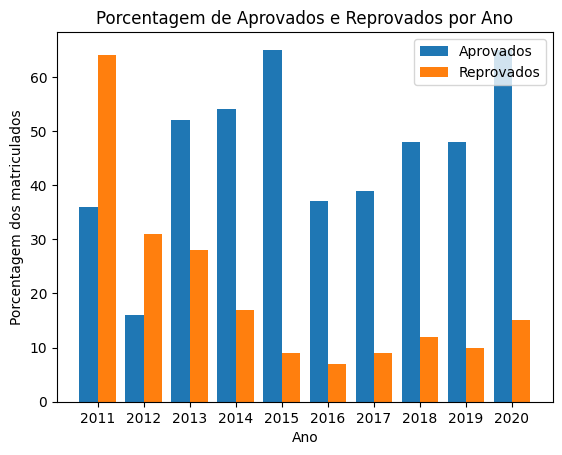

In [47]:
# Configurar as posições das barras e suas larguras
posicoes = range(len(matriculas_e_situacao_por_ano))
largura = 0.4

# Plotar o gráfico de barras
plt.bar(posicoes, matriculas_e_situacao_por_ano['Taxa aprovação (%)'], largura, label='Aprovados')
plt.bar([p + largura for p in posicoes], matriculas_e_situacao_por_ano['Taxa reprovação (%)'], largura, label='Reprovados')

# Configurar os rótulos do eixo x e o título do gráfico
plt.xticks([p + largura/2 for p in posicoes], matriculas_e_situacao_por_ano['ANO'])
plt.xlabel('Ano')
plt.ylabel('Porcentagem dos matriculados')
plt.title('Porcentagem de Aprovados e Reprovados por Ano')

# Adicionar uma legenda
plt.legend()

# Exibir o gráfico
plt.show()

É possível notar que a porcentagem de reprovados segue numa decrescente até 2016, momento em que cresce em todos os anos exceto quando houve aulas remotas em 2019. Em linhas gerais a porcentagem de aprovados variou mais de ano para ano, tendo atingido um pico em 2015. Após queda abrupta em 2016, seguiu con tendência de até subida até 2020. 